<a href="https://colab.research.google.com/github/abrahamfullstack/EDA-Projects/blob/main/Student_Alcohol_Consumption_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alcohol and School Success**


The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students


Does alcohol affect students’ grades? If not, what does?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

In [ ]:
# Get both datasets into one
math_data = pd.read_csv('student-mat.csv')
port_data = pd.read_csv('student-por.csv')

df = pd.concat([math_data, port_data])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

**Does alcohol affect students’ grades?**

The scores are divided in three columns (G1, G2, G3).

We cerate a new column with the average of those values

In [ ]:
df['grade']  = (df['G1'] * df['G2'] * df['G3']) / 3 
df['grade'].head()

0      60.000000
1      50.000000
2     186.666667
3    1050.000000
4     200.000000
Name: grade, dtype: float64

The alcohol consumption is stored in two colums, Dalc (workday alcohol consumption (numeric: from 1 - very low to 5 - very high)) and Walc (weekend alcohol consumption (numeric: from 1 - very low to 5 - very high))

We test the two alcohol features (X) against the final student grade (Y) using the ANOVA Correlation coefficient

In [ ]:
# Array with the features to test
alcohol_features = ['Dalc', 'Walc']

In [ ]:
alpha = 0.05
resultAnova = []

for feature in alcohol_features:
  CategoryGroupList = df.groupby('grade')[feature].apply(list)

  F, pv = f_oneway(*CategoryGroupList)

  # Check hypotesis using the P-value
  if pv < alpha:
    resultAnova.append([feature, 'Dependent', pv])
  else:
    resultAnova.append([feature, 'Independent', pv])

resultAnova = pd.DataFrame(resultAnova, columns=['Feature', 'Dependency', 'P-value'])
resultAnova

,Feature,Dependency,P-value
0,Dalc,Dependent,0.024689
1,Walc,Dependent,0.008517


Both feautures are afecting the output/student grades.

Here is a plot to show the dependency graphicaly

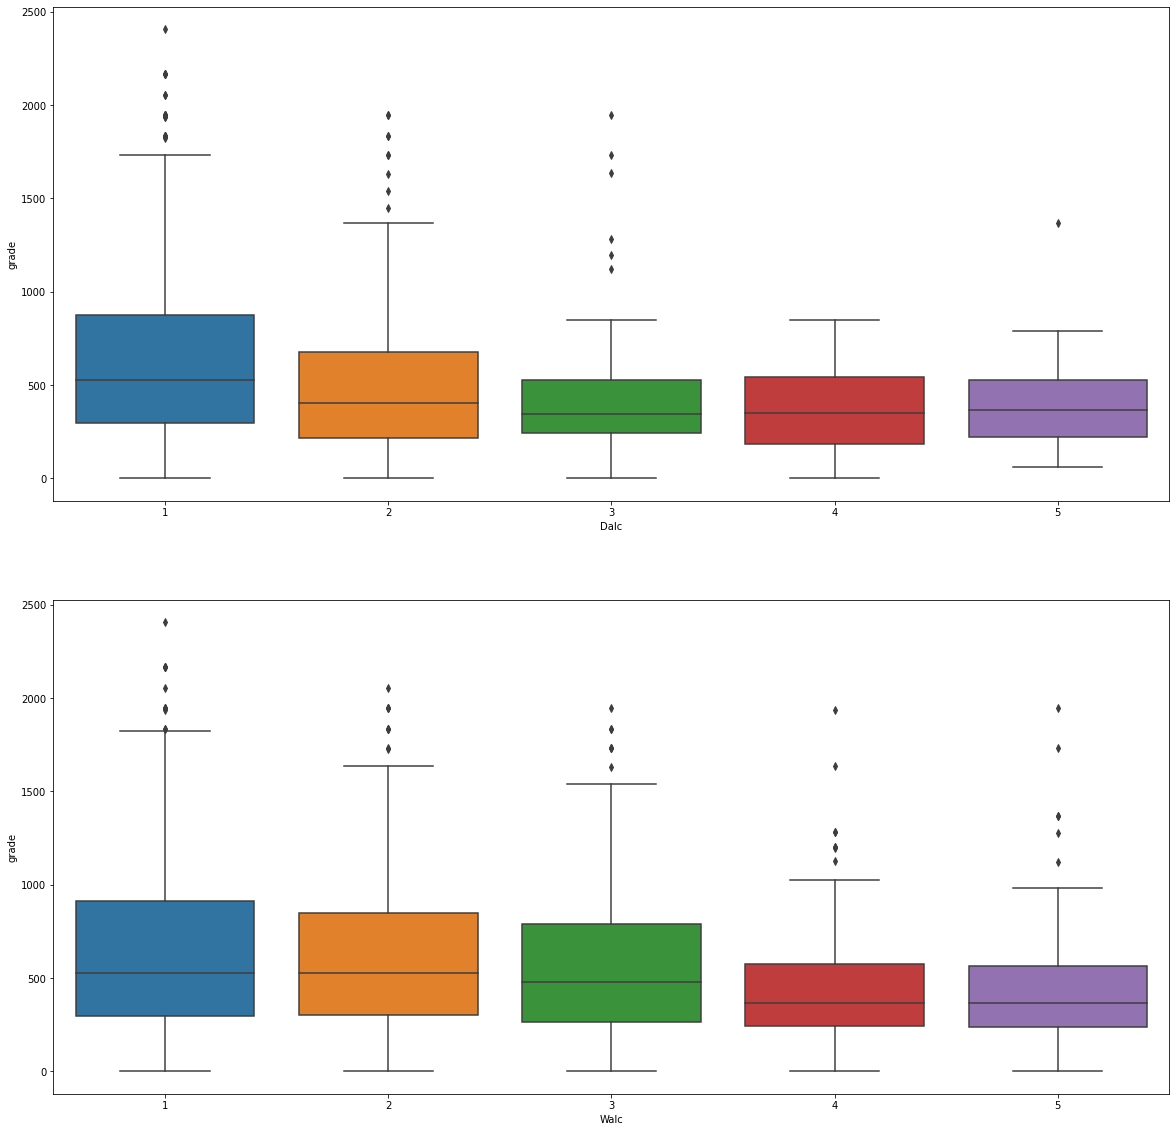

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

for feature, subplot in zip(alcohol_features, axes.flatten()):
  sns.boxplot(x=feature, y='grade', data=df, ax=subplot)

We can now tell that the more alcohol the student consumes, the lower the grades are.

FYI - Alcohol consumption is rated from 1 - very low to 5 - very high